In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load data
df = pd.read_csv("Summer-Olympic-medals-1976_to_2008.csv", encoding='latin-1')

# Drop rows with missing values
df = df.dropna()

# Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Replace Soviet Union with Russia
df['Country'] = df['Country'].replace('Soviet Union', 'Russia')

# Filter for Russia and USA
filtered_df = df[(df['Country_Code'].isin(['RUS', 'USA'])) | (df['Country'].isin(['Russia', 'United States']))]

In [6]:
filtered_df['Country']

1               Russia
2        United States
4        United States
5        United States
6               Russia
             ...      
15411           Russia
15413           Russia
15420    United States
15422           Russia
15427           Russia
Name: Country, Length: 3651, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


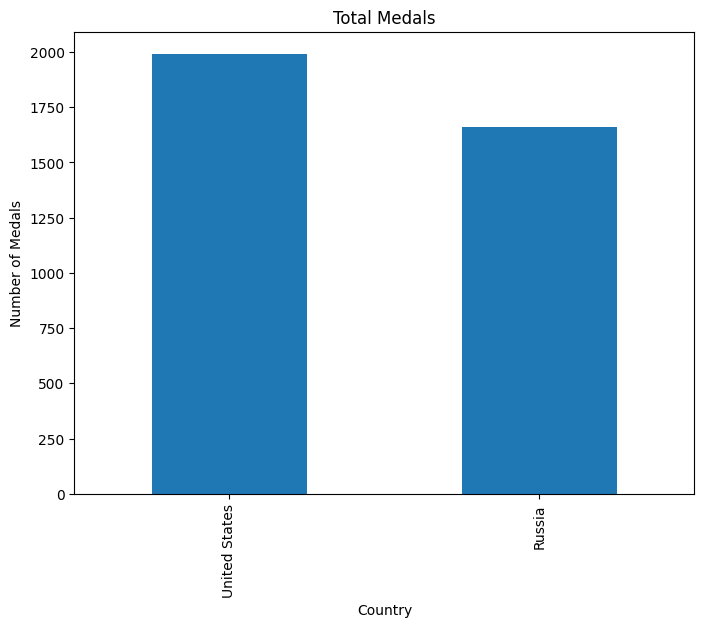

In [8]:
# Total Medals
total_medals = filtered_df['Country'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 6))
total_medals.plot(kind='bar')
plt.title('Total Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

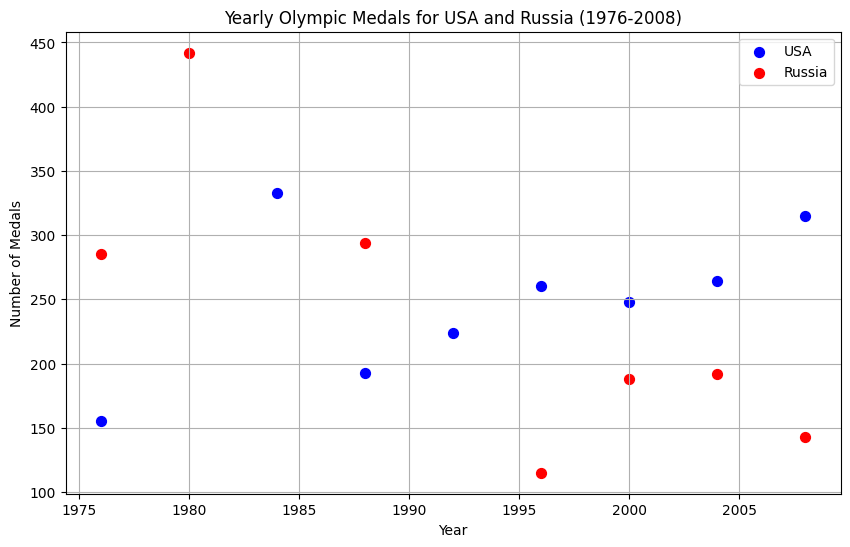

In [13]:
# Scatter Chart to Show Yearly Changes for Two Countries
plt.figure(figsize=(10, 6))

# Plotting for USA
usa_data = filtered_df[filtered_df['Country'] == 'United States'].groupby('Year').size().reset_index(name='Medals')
plt.scatter(usa_data['Year'], usa_data['Medals'], color='blue', label='USA', s=50)

# Plotting for Russia
russia_data = filtered_df[filtered_df['Country'].str.contains('Russia|Soviet Union')].groupby('Year').size().reset_index(name='Medals')
plt.scatter(russia_data['Year'], russia_data['Medals'], color='red', label='Russia', s=50)

# Chart details
plt.title('Yearly Olympic Medals for USA and Russia (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.grid(True)
plt.show()



<Figure size 1000x800 with 0 Axes>

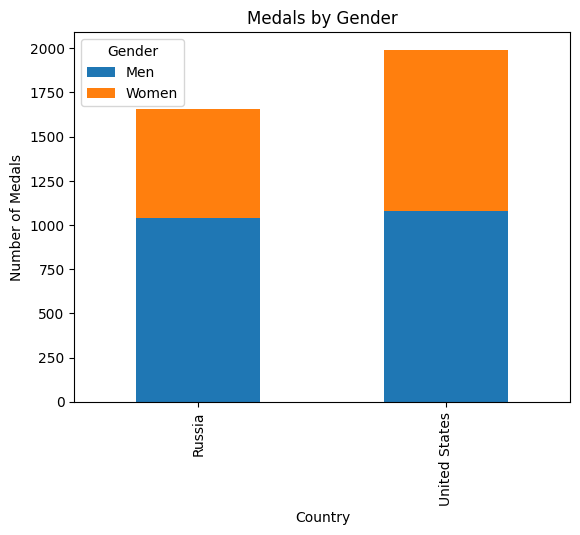

In [8]:
# Medals by Gender
medals_by_gender = filtered_df.groupby(['Country', 'Gender']).size().unstack(fill_value=0)

# Stacked Bar Chart
plt.figure(figsize=(10, 8))
medals_by_gender.plot(kind='bar', stacked=True)
plt.title('Medals by Gender')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.show()

<Figure size 1200x800 with 0 Axes>

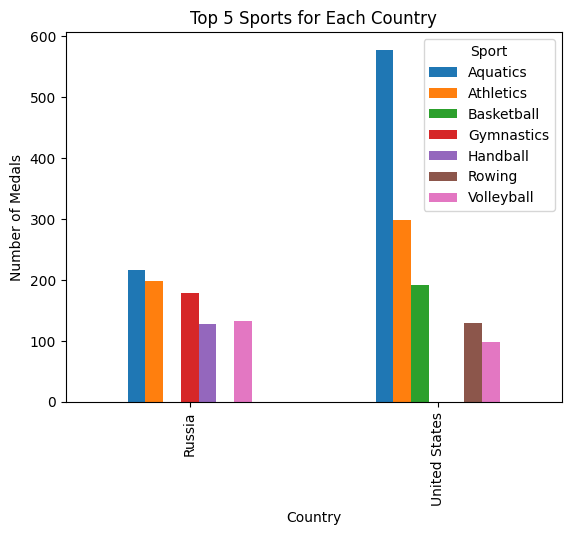

In [9]:
# Top 5 Sports for Each Country
top_sports = filtered_df.groupby(['Country', 'Sport']).size().unstack(fill_value=0)
top_sports = top_sports.apply(lambda x: x.nlargest(5), axis=1)

# Bar Chart
plt.figure(figsize=(12, 8))
top_sports.plot(kind='bar')
plt.title('Top 5 Sports for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Sport')
plt.show()

<Figure size 1000x800 with 0 Axes>

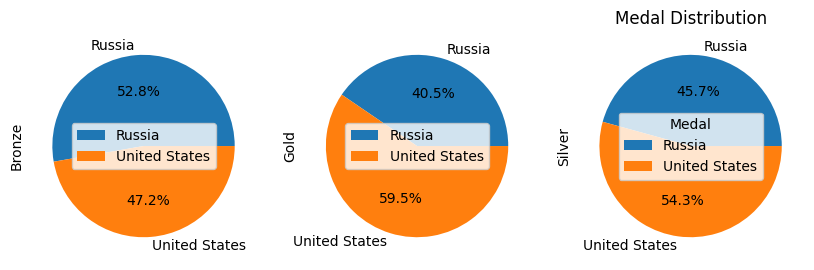

In [10]:
# Medal Distribution
medal_distribution = filtered_df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Pie Chart
plt.figure(figsize=(10, 8))
medal_distribution.plot(kind='pie', subplots=True, figsize=(10, 8), autopct='%1.1f%%')
plt.title('Medal Distribution')
plt.legend(title='Medal')
plt.show()